In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
df_2020 = pd.read_csv('../csv/delitos_2020.csv',low_memory=False, parse_dates = ['fecha'], dayfirst = True)
df_2019 = pd.read_csv('../csv/delitos_2019.csv', low_memory=False, parse_dates = ['fecha'], dayfirst = True)
df_2018 = pd.read_csv('../csv/delitos_2018.csv', low_memory=False, parse_dates = ['fecha'], dayfirst = True)
df_2017 = pd.read_csv('../csv/delitos_2017.csv', low_memory=False, parse_dates = ['fecha'], dayfirst = True)
df_2016 = pd.read_csv('../csv/delitos_2016.csv', low_memory=False, parse_dates = ['fecha'], dayfirst = True)

In [3]:
df_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66714 entries, 0 to 66713
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   id_mapa    66714 non-null  object        
 1   anio       66714 non-null  int64         
 2   mes        66714 non-null  object        
 3   dia        66714 non-null  object        
 4   fecha      66714 non-null  datetime64[ns]
 5   franja     66714 non-null  object        
 6   tipo       66714 non-null  object        
 7   subtipo    13633 non-null  object        
 8   uso_armas  7281 non-null   object        
 9   barrio     66303 non-null  object        
 10  comuna     66303 non-null  float64       
 11  latitud    66303 non-null  float64       
 12  longitud   66303 non-null  float64       
 13  victimas   190 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(8)
memory usage: 7.1+ MB


In [4]:
df_2019.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,1038983,2019-09-13,14,Robo (con violencia),NaN,NaN,6.0,Caballito,-34.609876,-58.456159
1,1038986,2019-09-13,16,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609394,-58.395934
2,1038989,2019-09-13,13,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609231,-58.411177
3,1038990,2019-09-13,16,Robo (con violencia),NaN,NaN,3.0,Balvanera,-34.609095,-58.405899
4,1038991,2019-09-13,11,Robo (con violencia),NaN,NaN,1.0,Monserrat,-34.609073,-58.380570


In [5]:
df1_2020 = df_2020.rename(columns = {'longitud':'long', 'latitud':'lat', 'franja':'franja_horaria', 
                          'id_mapa' : 'id', 'tipo' : 'tipo_delito', 'subtipo' : 'subtipo_delito'})
df1_2020.drop(['anio', 'mes', 'dia'], axis = 1, inplace = True)

In [6]:
df = pd.concat([df1_2020, df_2019, df_2018, df_2017, df_2016], axis = 0)

In [7]:
df.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,uso_armas,barrio,comuna,lat,long,victimas,cantidad_registrada
0,HC-2020-0007157,2020-01-04,10,Homicidio,Siniestro Vial,NaN,Villa Crespo,15.0,-34.592133,-58.439106,1.0,NaN
1,HC-2020-0009055,2020-01-05,20,Homicidio,Siniestro Vial,NaN,Flores,7.0,-34.646459,-58.450195,1.0,NaN
2,HC-2020-0022499,2020-01-11,6,Homicidio,Siniestro Vial,NaN,Balvanera,3.0,-34.609272,-58.393379,1.0,NaN
3,HC-2020-0028163,2020-01-14,6,Homicidio,Siniestro Vial,NaN,San Cristóbal,3.0,-34.624766,-58.410372,1.0,NaN
4,HC-2020-0029931,2020-01-14,21,Homicidio,Siniestro Vial,NaN,Monserrat,1.0,-34.609303,-58.390526,1.0,NaN


In [8]:
df['lat'] = df['lat'].apply(lambda x : x if x > -35 else x/1000)
df['long'] = df['long'].apply(lambda x : x if x > -59 else x/1000)

In [9]:
def pct_null (df):
    for col in df.columns:
        pct_missing = np.mean(df[col].isnull())
        print(f'{col} - {round(pct_missing*100)}%')

In [10]:
pct_null(df)

id - 0%
fecha - 0%
franja_horaria - 0%
tipo_delito - 0%
subtipo_delito - 86%
uso_armas - 99%
barrio - 2%
comuna - 2%
lat - 2%
long - 2%
victimas - 100%
cantidad_registrada - 32%


In [11]:
df.dropna(subset = ['barrio'], inplace = True)

In [12]:
df['mes'] = df['fecha'].dt.month
df['mes_nombre'] = df['fecha'].dt.month_name()
df['anio'] = df['fecha'].dt.year
df['dia'] = df['fecha'].dt.day_name()

In [13]:
df_mes = df.groupby(['anio','mes','mes_nombre'])['tipo_delito'].count().reset_index(name = 'count')

In [14]:
pio.templates

Templates configuration
-----------------------
    Default template: 'plotly'
    Available templates:
        ['ggplot2', 'seaborn', 'simple_white', 'plotly',
         'plotly_white', 'plotly_dark', 'presentation', 'xgridoff',
         'ygridoff', 'gridon', 'none']

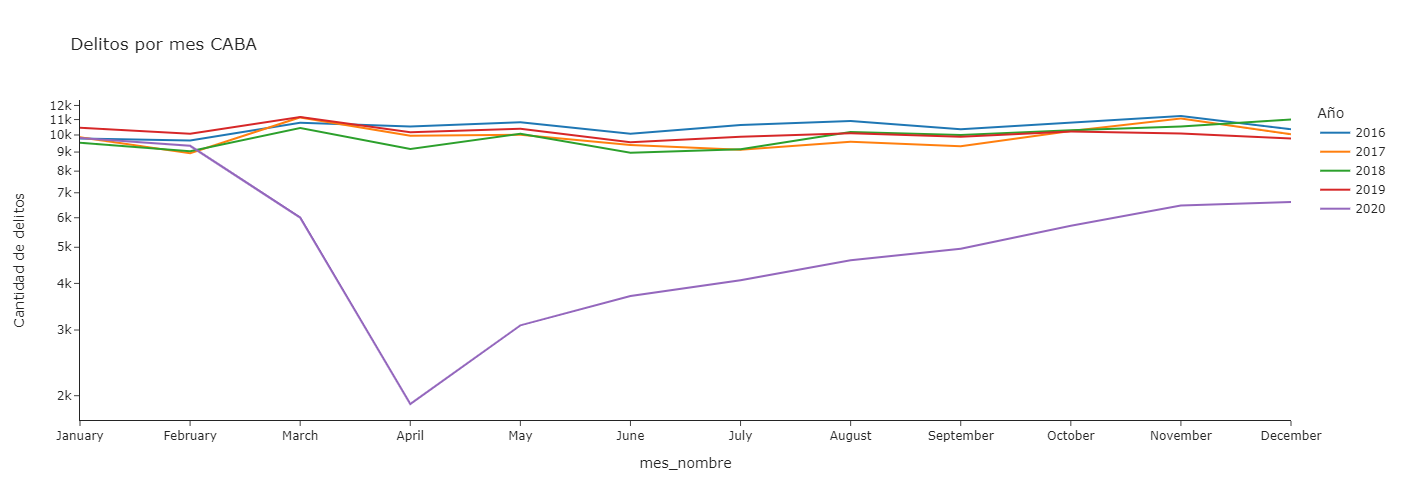

In [24]:
fig = px.line(df_mes, x = 'mes_nombre', y = 'count',
            color = 'anio',
            template = 'simple_white',
            labels = {'count' : 'Cantidad de delitos', 'mes': 'Meses', 'anio':'Año'},
            title = 'Delitos por mes CABA',
            hover_name = 'mes_nombre',
            height = 500, 
            log_y = True
            )
fig.show()

In [17]:
df_mes_tipo = df.groupby(['anio','mes','mes_nombre', 'tipo_delito'])['tipo_delito'].count().reset_index(name = 'count')
df_mes_tipo

,anio,mes,mes_nombre,tipo_delito,count
0,2016,1,January,Homicidio,25
1,2016,1,January,Hurto (sin violencia),3574
2,2016,1,January,Lesiones,588
3,2016,1,January,Robo (con violencia),5600
4,2016,2,February,Homicidio,25
...,...,...,...,...,...
235,2020,11,November,Robo (con violencia),3298
236,2020,12,December,Homicidio,33
237,2020,12,December,Hurto (sin violencia),2518
238,2020,12,December,Lesiones,668


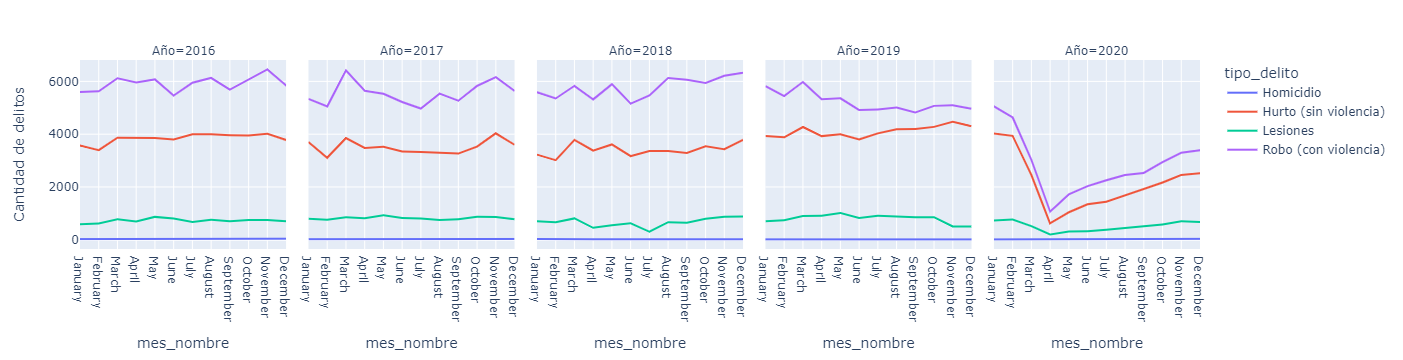

In [25]:
fig = px.line(df_mes_tipo, x = 'mes_nombre', y = 'count',
             color = 'tipo_delito',
             facet_col = 'anio',
             labels = {'count' : 'Cantidad de delitos', 'mes': 'Meses', 'anio':'Año'})
fig.show()

In [19]:
df.head()

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,uso_armas,barrio,comuna,lat,long,victimas,cantidad_registrada,mes,mes_nombre,anio,dia
0,HC-2020-0007157,2020-01-04,10,Homicidio,Siniestro Vial,NaN,Villa Crespo,15.0,-34.592133,-58.439106,1.0,NaN,1,January,2020,Saturday
1,HC-2020-0009055,2020-01-05,20,Homicidio,Siniestro Vial,NaN,Flores,7.0,-34.646459,-58.450195,1.0,NaN,1,January,2020,Sunday
2,HC-2020-0022499,2020-01-11,6,Homicidio,Siniestro Vial,NaN,Balvanera,3.0,-34.609272,-58.393379,1.0,NaN,1,January,2020,Saturday
3,HC-2020-0028163,2020-01-14,6,Homicidio,Siniestro Vial,NaN,San Cristóbal,3.0,-34.624766,-58.410372,1.0,NaN,1,January,2020,Tuesday
4,HC-2020-0029931,2020-01-14,21,Homicidio,Siniestro Vial,NaN,Monserrat,1.0,-34.609303,-58.390526,1.0,NaN,1,January,2020,Tuesday


In [20]:
df_dia = df.groupby(['anio','dia'])['tipo_delito'].count().reset_index(name = 'count')

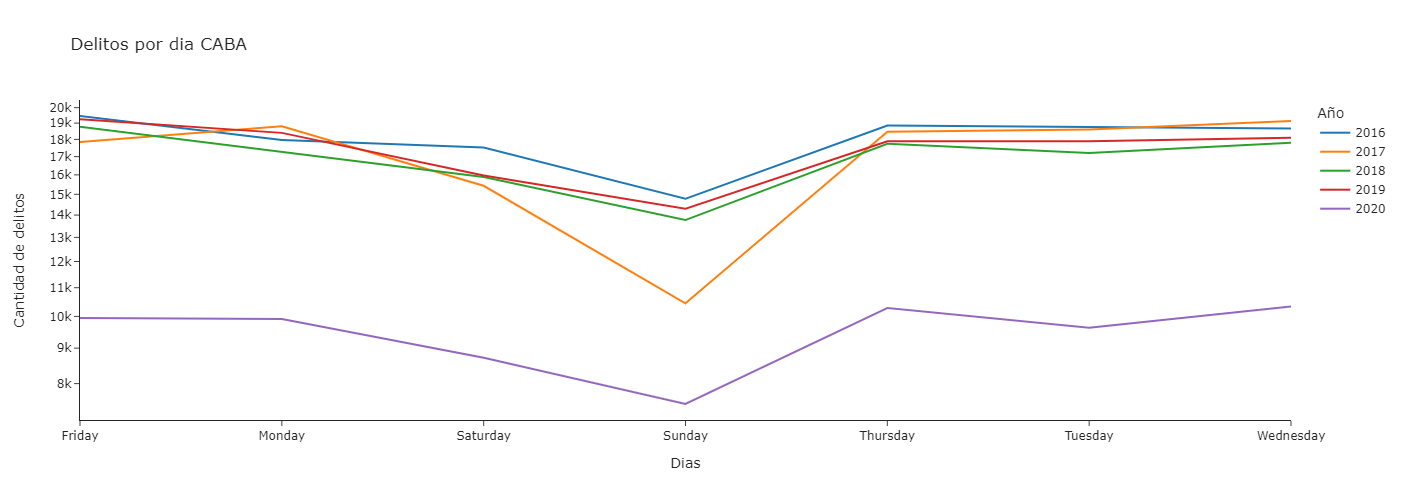

In [26]:
fig = px.line(df_dia, x = 'dia', y = 'count',
            color = 'anio',
            template = 'simple_white',
            labels = {'count' : 'Cantidad de delitos', 'dia': 'Dias', 'anio':'Año'},
            title = 'Delitos por dia CABA',
            hover_name = 'dia',
            height = 500, 
            log_y = True
            )
fig.show()

In [22]:
df_dia_tipo = df.groupby(['anio','dia', 'tipo_delito'])['tipo_delito'].count().reset_index(name = 'count')

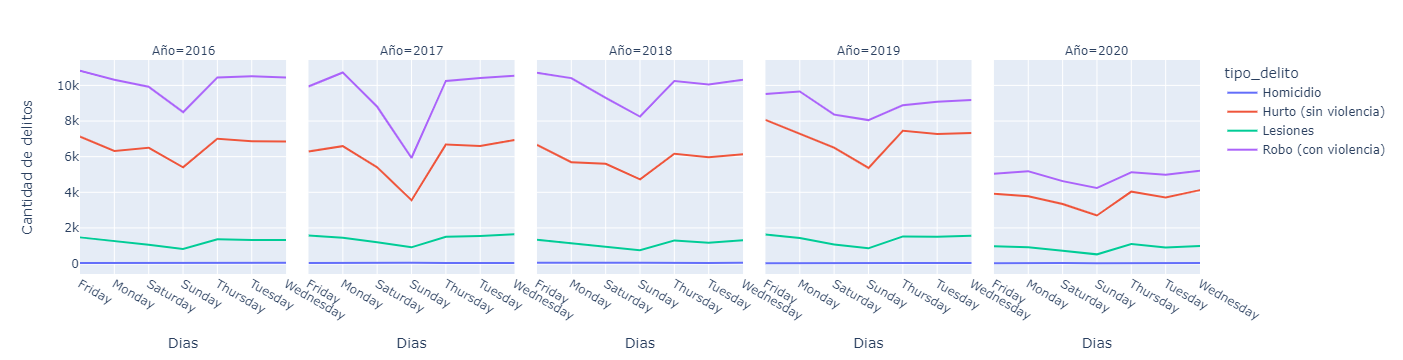

In [27]:
fig = px.line(df_dia_tipo, x = 'dia', y = 'count',
             color = 'tipo_delito',
             facet_col = 'anio',
             labels = {'count' : 'Cantidad de delitos', 'dia': 'Dias', 'anio':'Año'},)
fig.show()

In [38]:
df_men  = df.loc[df['fecha'] > '2020/12/25']

In [39]:
df_men

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,uso_armas,barrio,comuna,lat,long,victimas,cantidad_registrada,mes,mes_nombre,anio,dia
69,HC-2020-0676996,2020-12-27,4,Homicidio,Siniestro Vial,NaN,Saavedra,12.0,-34.548367,-58.493326,1.0,NaN,12,December,2020,Sunday
187,HD-2020-0677951,2020-12-28,5,Homicidio,Doloso,NaN,Retiro,1.0,-34.580131,-58.382000,1.0,NaN,12,December,2020,Monday
188,HD-2020-0684514,2020-12-31,13,Homicidio,Doloso,NaN,Constitución,1.0,-34.624757,-58.385788,1.0,NaN,12,December,2020,Thursday
190,LC-2020-0000055,2020-12-31,22,Lesiones,Siniestro Vial,NaN,Palermo,14.0,-34.597302,-58.421756,NaN,NaN,12,December,2020,Thursday
191,LC-2020-0000065,2020-12-31,22,Lesiones,Siniestro Vial,NaN,Nueva Pompeya,4.0,-34.654090,-58.416597,NaN,NaN,12,December,2020,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66707,RH-2021-0005667,2020-12-29,23,Robo (con violencia),NaN,NaN,Balvanera,3.0,-34.601985,-58.392599,NaN,NaN,12,December,2020,Tuesday
66708,RH-2021-0005730,2020-12-30,23,Hurto (sin violencia),NaN,NaN,Nuñez,13.0,-34.546946,-58.461656,NaN,NaN,12,December,2020,Wednesday
66711,RH-2021-0006016,2020-12-30,1,Hurto (sin violencia),NaN,NaN,Balvanera,3.0,-34.607985,-58.392040,NaN,NaN,12,December,2020,Wednesday
66712,RH-2021-0006309,2020-12-31,21,Hurto (sin violencia),NaN,NaN,Villa Pueyrredón,12.0,-34.589516,-58.505280,NaN,NaN,12,December,2020,Thursday


In [40]:
 df_lat_long = df_men.groupby(['anio', 'barrio', 'long', 'lat'])['tipo_delito'].count().reset_index()

In [52]:
token = 'pk.eyJ1Ijoic2ViYWtpcmlsbCIsImEiOiJja3Mwb2VoczkwMDE2MndydzBtdTZvaDRoIn0.lwZfQxI25txfqk5swoqeuw'
fig = go.Figure(go.Scattermapbox(
    lon = df_lat_long['long'],
    lat = df_lat_long['lat'],
    mode = 'markers+text',
    marker = go.scattermapbox.Marker(size = df_lat_long['tipo_delito'],
                                     color = df_lat_long['tipo_delito'],
                                     colorscale = 'Edge',
                                     showscale = True,
                                     sizemode = 'area',
                                     opacity = .8),
    hoverinfo = 'text',
    hovertext = 
    '<b>Barrio<b>: ' + df_lat_long['barrio'].astype(str) + '<b>' +
    '<b>Cantidad de delitos<b>' + df_lat_long['tipo_delito'].astype(str) + '<b>'
))

fig.update_layout(
    hovermode = 'x',
    margin = dict(r=0, l=0, b=0, t=0),
    mapbox = dict(
        accesstoken = token,
        style = 'stamen-terrain',
        zoom = 10,
        center = dict(
            lat = -34.6083,
            lon = -58.3712
        )
    ),
    showlegend = True,
    autosize =True
    )